<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Tarea6Dinosaurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bayes
import numpy as np
import matplotlib.pyplot as plt

#2

# a)
prior = np.array([0.4,0.3,0.2,0.1])
l= np.array([1,2,3,4])

lhat= np.sum(prior*l)
lhat

# b)
def likelihood(x,l):
  return l**x*np.exp(-l)/np.math.factorial(x)

likelihood(4,l)

# c)
denominador=np.sum(prior*likelihood(4,l))
posterior= prior*likelihood(4,l)/denominador
posterior

# d)
normalizado=np.sum(posterior)
normalizado

# e)
Más_probable=np.argmax(posterior)
Más_probable
# El modelo más probable es el modelo que dice que, en promedio, se acercan grupos de 3 estudiantes a la secretaría de física

# f)
Mejor_lhat=np.sum(posterior*l)
Mejor_lhat

<ipython-input-1-611b728205b8>:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return l**x*np.exp(-l)/np.math.factorial(x)


2.7707584253176796

In [2]:
#3

# a)
prior = np.array([0.4,0.3,0.2,0.1])
l= np.array([1,2,3,4])

lhat= 3.27
lhat

def likelihood2(x,l):
  return l**x*np.exp(-l)/np.math.factorial(x)

l_x1=likelihood(4,l)
l_x2=likelihood(5,l)

<ipython-input-1-611b728205b8>:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return l**x*np.exp(-l)/np.math.factorial(x)


[0.69230769 0.23076923 0.07692308]
La probabilidad de que la partícula detectada sea un electrón es del 69.23 %
La probabilidad de que la partícula detectada sea un prtón es del 23.08 %
La probabilidad de que la partícula detectada sea una aprtícula α es del 7.69 %


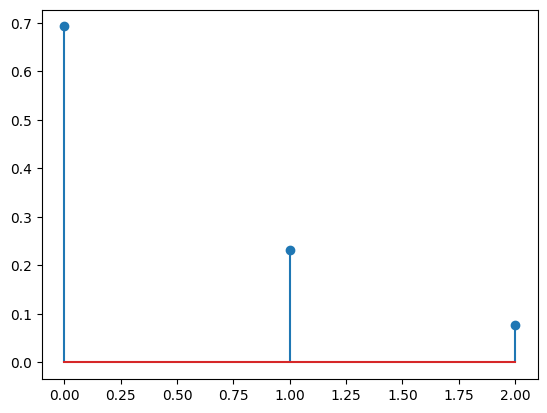

In [3]:
#4

# a)
priorP=np.array([0.5,0.25,0.25])

# b)
Eficiencia=np.array([0.9,0.6,0.2])
PD=np.dot(priorP,Eficiencia)

# c)
Posterior=priorP*Eficiencia/PD
plt.stem(Posterior)
Posterior

#d)
print(Posterior)
print("La probabilidad de que la partícula detectada sea un electrón es del " + str(np.round(Posterior[0]*100,2))+" %")
print("La probabilidad de que la partícula detectada sea un prtón es del " + str(np.round(Posterior[1]*100,2))+" %")
print("La probabilidad de que la partícula detectada sea una aprtícula α es del " + str(np.round(Posterior[2]*100,2))+" %")

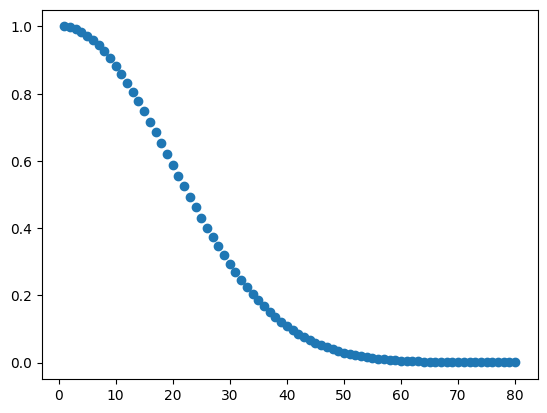

In [4]:
# Generales de probabilidad

# 4)

def Propabilidad_cumpleaños(n):
  if n>365:
    return "n no está en el intervalo permitido (n<=365). Pruebe otro"
  else:
    p=1
    for i in range(n):
      p=p*(365-i)/365
    return p

Propabilidad_cumpleaños(25)

l=[]
for j in range(80):
  l.append(j+1)
N=np.array(l)

probabilidades = [Propabilidad_cumpleaños(n) for n in N]

plt.scatter(N, probabilidades)
plt.show()

In [5]:
# 6)

Lanzamientos_totales = 10**5

def P_par(Lanzamientos_totales):
  Pares=0
  for i in range(Lanzamientos_totales):
    Lanzamientos=np.random.randint(1,7,3)
    if Lanzamientos[0]==Lanzamientos[1] or Lanzamientos[1]==Lanzamientos[2] or Lanzamientos[0]==Lanzamientos[2]:
      Pares+=1
  return Pares/Lanzamientos_totales

P_par(Lanzamientos_totales)

0.44749

In [6]:
# 7) Generales de Probabilidad

# a)
n_simulaciones = 10**5

def exactamente_dos_iguales(dados):
    valores_unicos, conteos = np.unique(dados, return_counts=True)

    return (2 in conteos) and (len(conteos[conteos == 2]) == 1)


conteo_exitos = 0

for _ in range(n_simulaciones):

    lanzamientos = np.random.randint(1, 7, 5)
    if exactamente_dos_iguales(lanzamientos):
        conteo_exitos += 1


probabilidad = conteo_exitos / n_simulaciones

probabilidad

0.50411

In [7]:
# b)
def dos_y_dos_distintos(dados):
    valores_unicos, conteos = np.unique(dados, return_counts=True)

    if len(valores_unicos) == 3:

        if sorted(conteos) == [1, 2, 2]:
            return True
    return False


conteo_exitos = 0

for _ in range(n_simulaciones):

    lanzamientos = np.random.randint(1, 7, 5)
    if dos_y_dos_distintos(lanzamientos):
        conteo_exitos += 1


probabilidad = conteo_exitos / n_simulaciones

probabilidad

0.23209

In [24]:
# 8) Hidden Markov Models

# a)
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Moneda=np.array([0,1])
Prior=np.array([0.2,0.8])
Obs=np.array([1,0,0,0,1,0,1,0])

T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])

DictHidden = {0:'Justa',1:'Sesgada'}

DictObs = {0:'Cara',1:'Sello'}

def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

HiddenStates=GetStates(Moneda,8)

# b)
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.

  p *= Prior[ State[0] ]

  for i in range(n-1):
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p

P = np.zeros(HiddenStates.shape[0])

for i in range(P.shape[0]):
  P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

ii = np.where( P == np.max(P) )
print(HiddenStates[ii],P[ii])

[[1 1 1 1 0 0 0 0]] [0.0001911]


In [9]:
# c)
ObsStates = GetStates([0,1],8)
ObsStates

Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):

  dim = HiddenStates.shape[0]
  P = np.zeros(dim)

  for i in range(dim):
    P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)

  PObs[j] = np.sum(P)

PObs

array([0.13698241, 0.04114921, 0.0347373 , 0.03175272, 0.03026766,
       0.02932288, 0.02830811, 0.02656789, 0.02297818, 0.01870516,
       0.01330002, 0.01467809, 0.01079433, 0.01067359, 0.01276253,
       0.00956961, 0.00877661, 0.00936674, 0.01172117, 0.00883478,
       0.00776184, 0.00767971, 0.00853533, 0.01088136, 0.00811519,
       0.00697382, 0.00661175, 0.00679511, 0.00764233, 0.00970066,
       0.00694603, 0.00590355, 0.00547305, 0.00537647, 0.00555143,
       0.00611094, 0.0074164 , 0.00955193, 0.00649319, 0.00616157,
       0.00733671, 0.00505945, 0.00428819, 0.00497251, 0.00456283,
       0.0048075 , 0.00623446, 0.00432462, 0.00337544, 0.00382959,
       0.00321043, 0.00330316, 0.00416108, 0.00372302, 0.00355961,
       0.00405611, 0.00553322, 0.00381405, 0.00283376, 0.00316972,
       0.00249084, 0.00251514, 0.00309313, 0.00256378, 0.00241017,
       0.0026765 , 0.00353481, 0.00309969, 0.00278698, 0.0028754 ,
       0.00342205, 0.00478004, 0.00319794, 0.00231328, 0.00256

In [10]:
# d)
np.sum(PObs)

#e) No.

1.0000000000000007

In [11]:
# 9) Muestreo

#7)
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


os.chdir("/content/drive/MyDrive/Archivos de Métodos")
!ls


file = '/content/drive/MyDrive/Archivos de Métodos/Matematicas.txt'


data = pd.read_csv(file, sep=" ", header=None)
data.columns = ['Notas']
Notas = np.array(data['Notas'])
Notas

# a)
Media=np.mean(Notas)
Media

# b)
Mediana=np.percentile(Notas,50)
Mediana

# c)
data_sorted = np.sort(Notas)

freq_acum = np.arange(1, len(data_sorted) + 1)

dist_acum_prob = freq_acum / len(data_sorted)

freq_acum, dist_acum_prob

Mounted at /content/drive
datos_04.npz  Matematicas.txt  MinimosCuadratico.txt  MinimosLineal.txt


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 array([0.0125, 0.025 , 0.0375, 0.05  , 0.0625, 0.075 , 0.0875, 0.1   ,
        0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875, 0.2   ,
        0.2125, 0.225 , 0.2375, 0.25  , 0.2625, 0.275 , 0.2875, 0.3   ,
        0.3125, 0.325 , 0.3375, 0.35  , 0.3625, 0.375 , 0.3875, 0.4   ,
        0.4125, 0.425 , 0.4375, 0.45  , 0.4625, 0.475 , 0.4875, 0.5   ,
        0.5125, 0.525 , 0.5375, 0.55  , 0.5625, 0.575 , 0.5875, 0.6   ,
        0.6125, 0.625 , 0.6375, 0.65  , 0.6625, 0.675 , 0.6875, 0.7   ,
        0.7125, 0.725 , 0.7375, 0.75  , 0.7625, 0.775 , 0.7875, 0.8   ,
        0.8125, 0.825 , 0.8375, 0.85  , 0.8625, 0.875 , 0.8875

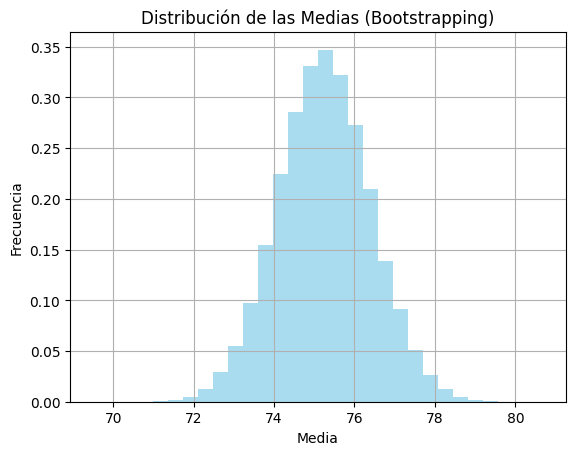

In [12]:
# d)
import random
n_bootstrap = 1000000
sample_size = len(Notas)

bootstrap_means = [np.mean(random.choices(Notas, k=sample_size)) for _ in range(n_bootstrap)]

plt.hist(bootstrap_means, bins=30, alpha=0.7, color="skyblue", density=True)
plt.title("Distribución de las Medias (Bootstrapping)")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

<ipython-input-13-fe9c1f97207e>:10: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, pdf, 'r-', label=f"Gaussian fit", linestyle='--')


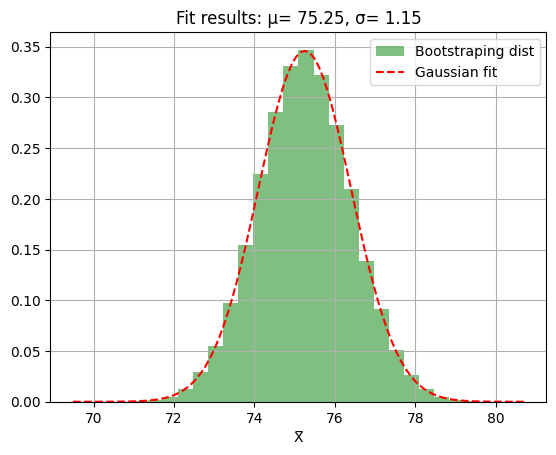

In [13]:
# e)
from scipy.stats import norm

mean_fit, std_fit = norm.fit(bootstrap_means)

x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
pdf = norm.pdf(x, mean_fit, std_fit)

plt.hist(bootstrap_means, bins=30, alpha=0.5, color="g", density=True, label="Bootstraping dist")
plt.plot(x, pdf, 'r-', label=f"Gaussian fit", linestyle='--')
plt.title(f"Fit results: μ= {mean_fit:.2f}, σ= {std_fit:.2f}") # Added f-string formatting
plt.xlabel("X̅")
plt.legend()
plt.grid()
plt.show()

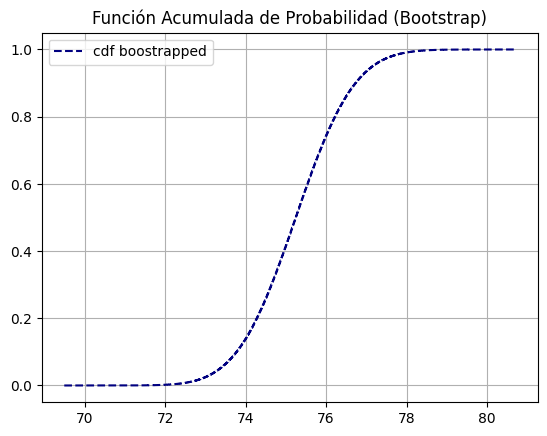

In [14]:
#f)
bootstrap_means_sorted = np.sort(bootstrap_means)

cdf = np.arange(1, len(bootstrap_means_sorted) + 1) / len(bootstrap_means_sorted)

median_bootstrap = bootstrap_means_sorted[np.searchsorted(cdf, 0.5)]

plt.step(bootstrap_means_sorted, cdf, where="post", label="cdf boostrapped", linestyle='--', color='navy')
plt.title("Función Acumulada de Probabilidad (Bootstrap)")
plt.legend()
plt.grid()
plt.show()

In [29]:
# 11)

# a)
N = 10**4

X1 = np.random.gamma(shape=2, scale=3, size=N)
X2 = np.random.normal(loc=5, scale=2, size=N)
X3 = np.random.uniform(low=0, high=10, size=N)

X = X1 + 2 * X2 - X3

mean_X = np.mean(X)
var_X = np.var(X)

mean_X, var_X

(11.021576390667786, 42.65749997574237)

In [31]:
# b)
a = np.array([1, 2, -1])
X_ = np.array([X1,X2,X3])

E1=np.mean(X1)
E2=np.mean(X2)
E3=np.mean(X3)
E_X=np.array([E1,E2,E3])

E = np.dot(a.T, E_X)

V1=np.var(X1)
V2=np.var(X2)
V3=np.var(X3)
V_X=np.array([V1,V2,V3])

Cov = np.diag([V1, V2, V3])

Var = np.dot(a.T, Cov).dot(a)

E,Var

(11.021576390667784, 43.32911356961097)

In [32]:
# c)
corr_X1_X2 = np.corrcoef(X1, X2)[0, 1]
corr_X1_X3 = np.corrcoef(X1, X3)[0, 1]
corr_X2_X3 = np.corrcoef(X2, X3)[0, 1]

corr_X1_X2, corr_X1_X3, corr_X2_X3

(-0.020490390073727792, 0.0012554208296648261, -0.0031769393165885103)

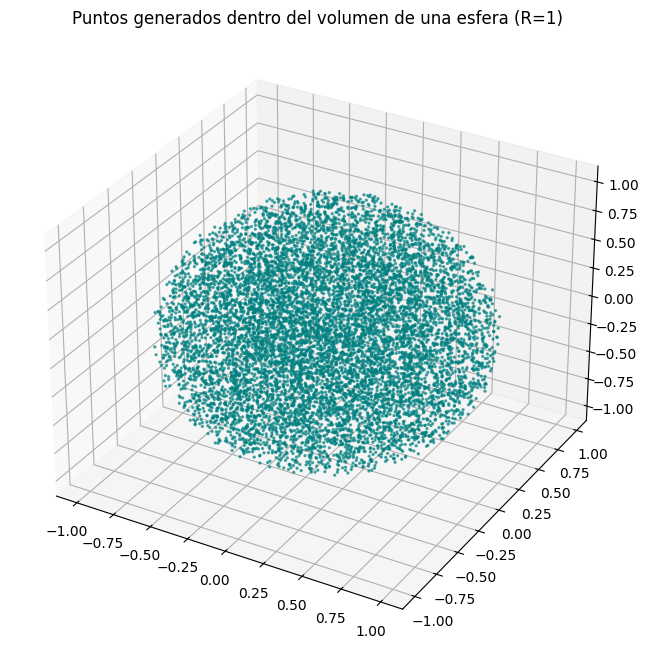

In [42]:
# 10) MonteCarlo

#6)
num_points = 10000

phi = np.random.uniform(0, 2 * np.pi, num_points)
cos_theta = np.random.uniform(-1, 1, num_points)
theta = np.arccos(cos_theta)

u = np.random.uniform(0, 1, num_points)
r = u ** (1/3)

x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=2, color='teal', alpha=0.6)
ax.set_title("Puntos generados dentro del volumen de una esfera (R=1)")
plt.show()

In [46]:
Ixx = (1/num_points) * np.sum(y**2 + z**2)
Ixx

0.39966382483492374

In [45]:
Iyy = (1/num_points) * np.sum(x**2 + z**2)
Iyy

0.4012836386346346

In [44]:
Izz = (1/num_points) * np.sum(x**2 + y**2)
Izz

0.39738103205830266

In [43]:
Ixy = -(1/num_points) * np.sum(x*y)
Ixy

0.0014854794299231674

In [47]:
# 9)
from scipy.special import gamma

def f(x, alpha=2, beta=4):
    C = gamma(alpha + beta) / (gamma(alpha) * gamma(beta))
    return C * x**(alpha - 1) * (1 - x)**(beta - 1)

M = 2.5

def montecarlo_acept_recha(n_samples, alpha=2, beta=4):
    acceptances = 0
    for _ in range(n_samples):
        x = np.random.uniform(0, 1)
        u = np.random.uniform(0, 1)
        if u <= f(x, alpha, beta) / M:
            acceptances += 1
    area_estimate = acceptances / n_samples * M
    return area_estimate

incertidumbre = 0.01
area_estimates = []
n_samples = 1000000
while True:
    estimate = montecarlo_acept_recha(n_samples)
    area_estimates.append(estimate)
    std_dev = np.std(area_estimates)
    relative_error = std_dev / np.mean(area_estimates)
    if relative_error <= incertidumbre:
        break
    n_samples += 10000

resultado=np.mean(area_estimates)
resultado

1.0024375